In [1]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('reshape2')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
#source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
library(scales)
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

Run citation('hdp') for citation instructions,
    and file.show(system.file('LICENSE', package='hdp')) for license details.

Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
### Tools to launch HDP and get results

launch <- function(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab){
    number_of_chains <- chains
    chain_list <- vector('list', number_of_chains)
    hdp <- initialise_hdp_yanis(data = data,hh=base_dist,alphaa = aa,alphab= ab)


    for (i in 1:number_of_chains) {
        seed <- i * 100
        print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))

        # run single hdp chain
        chain_list[[i]] <- activate_and_run_hdp(hdp,
                                                initcc = initial_clusters,
                                                burnin = burn,
                                                n      = posterior_samples,
                                                space  = 20,
                                                seed   = seed)
        print_and_flush('\n')
    }

    multi_output <- hdp_multi_chain(chain_list)
    print(multi_output)
}

In [3]:
df_to_recluster <- read.table("df_to_recluster.tsv")
df_to_recluster$t_v_11 <- NULL

In [4]:
num_cols = ncol(df_to_recluster[colSums(df_to_recluster) > 0])  ## keep only column that have at least a mutation
num_cols
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1)+1)/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

binomial <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],bin))
gaussian <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],normal))
pois <- as.numeric(unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],poisson)))
unif <- unlist(sapply(df_to_recluster[colSums(df_to_recluster) > 0],equally))

[1] 130

Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.1 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.1 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.1 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq             
2  1           371   41.4988814317673 
3  2           204   22.8187919463087 
1  0           136   15.2125279642058 
4  3            82   9.17225950782998 
6  5            56   6.26398210290828 
5  4            39   4.36241610738255 
7  6             4   0.447427293064877
8  7             2   0.223713646532438
11 -- total -- 894   100%

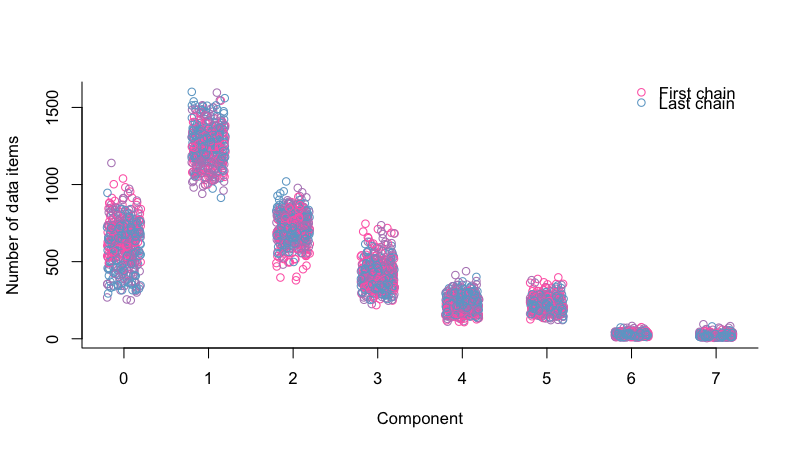

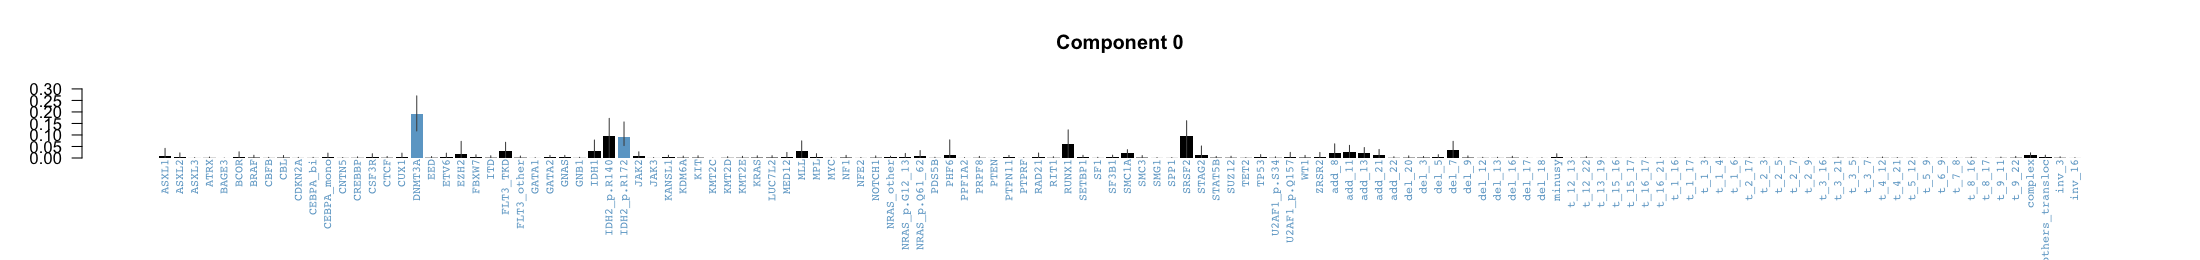

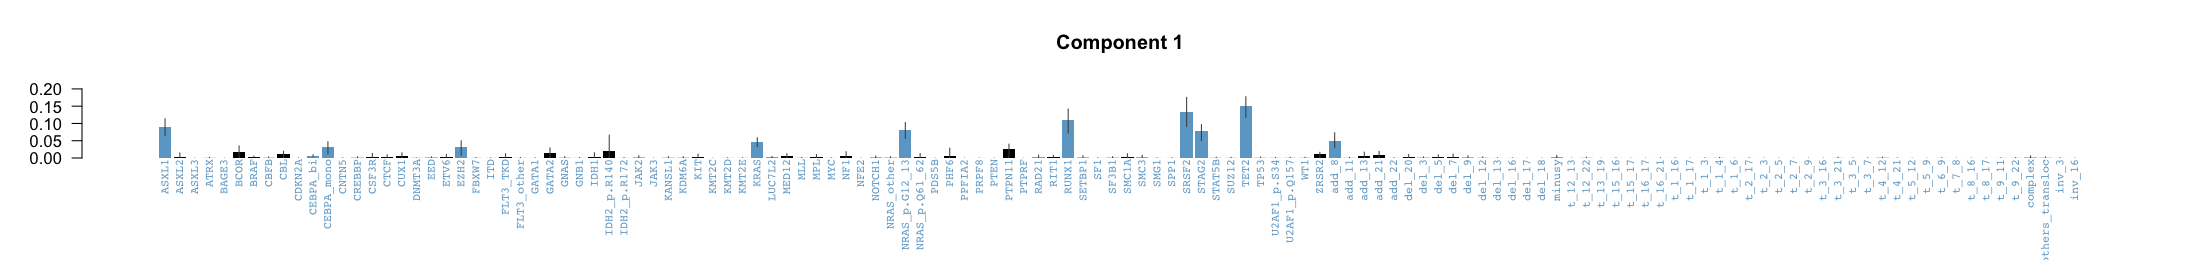

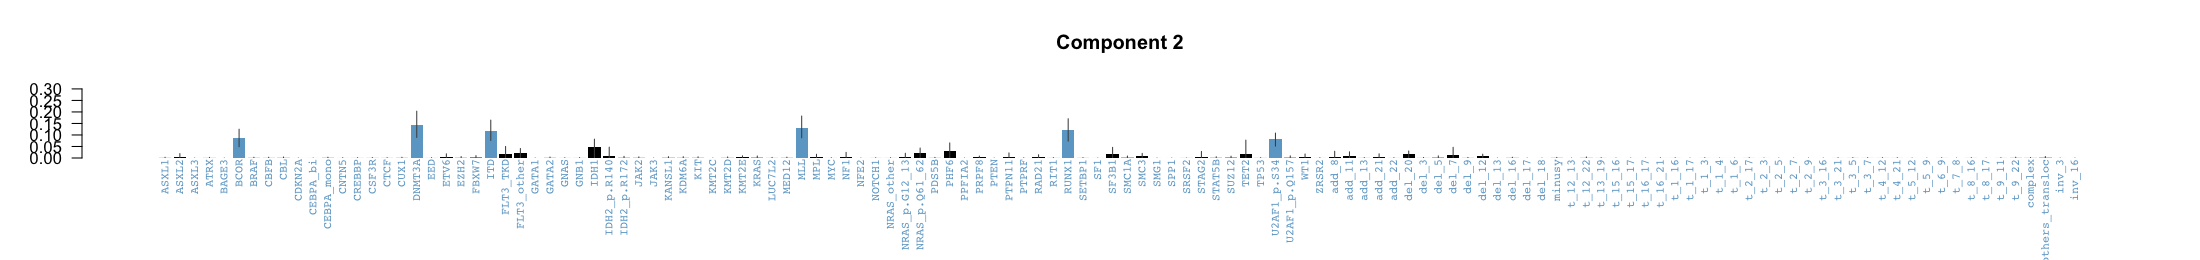

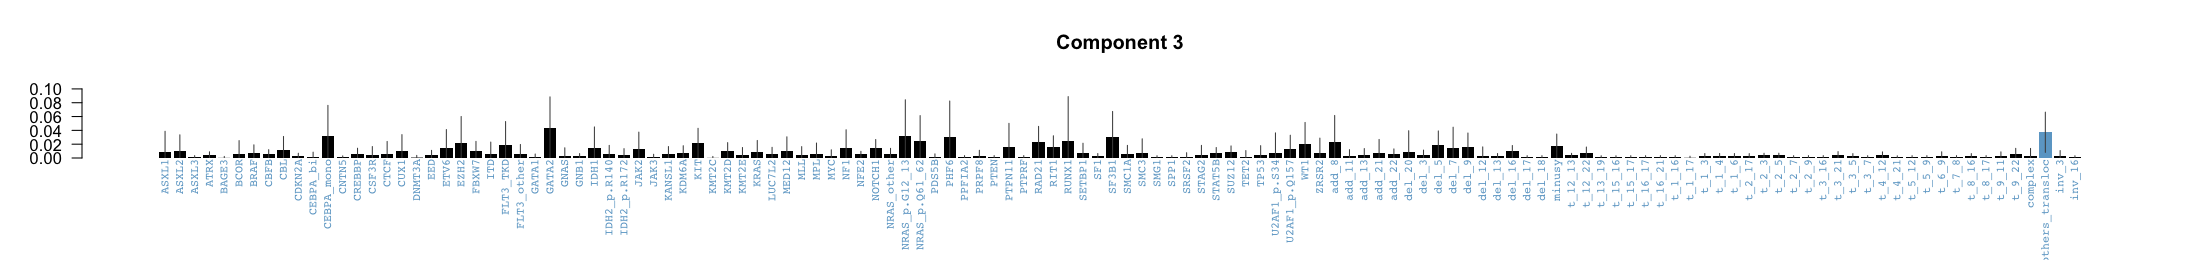

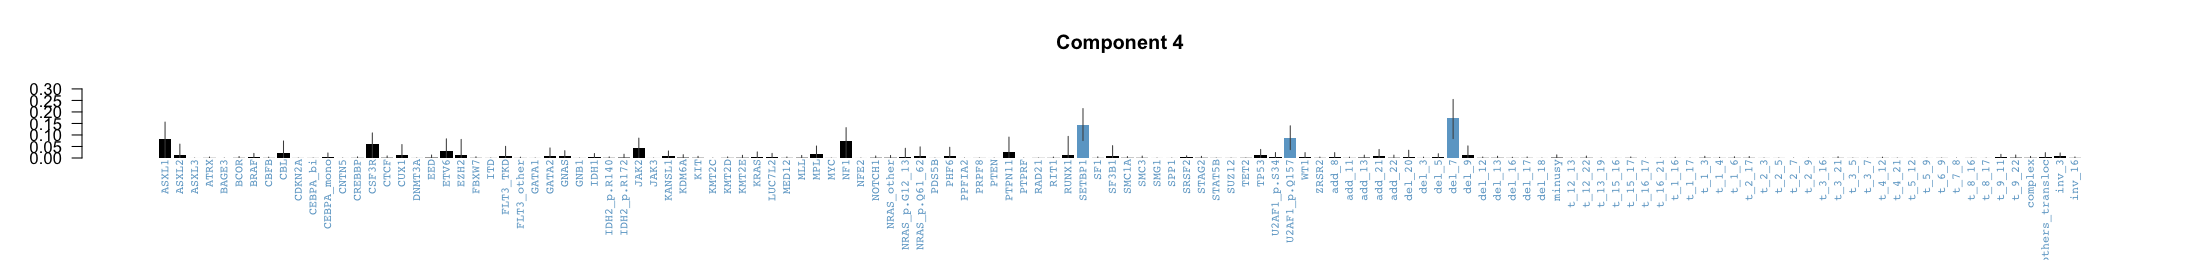

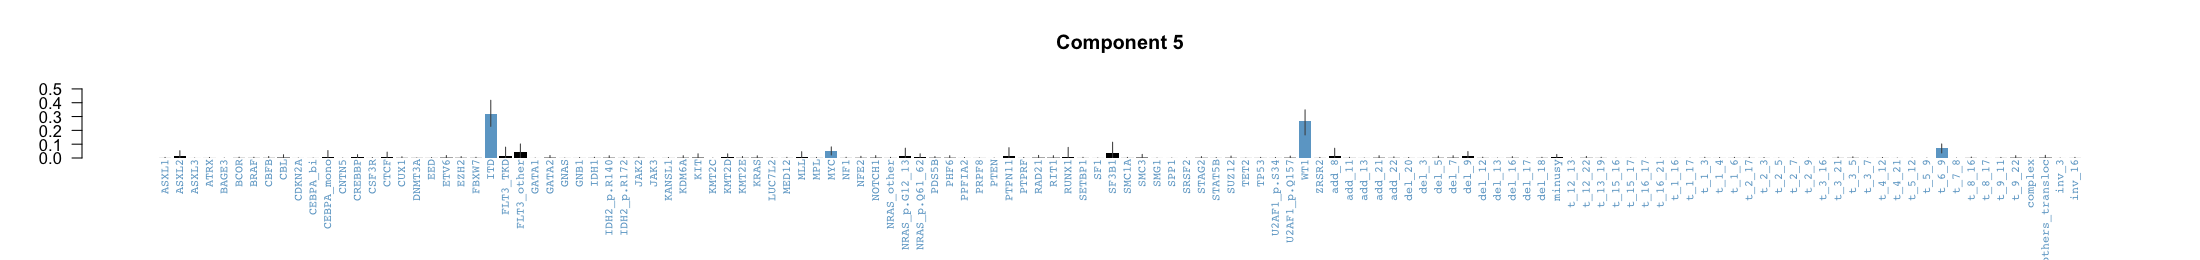

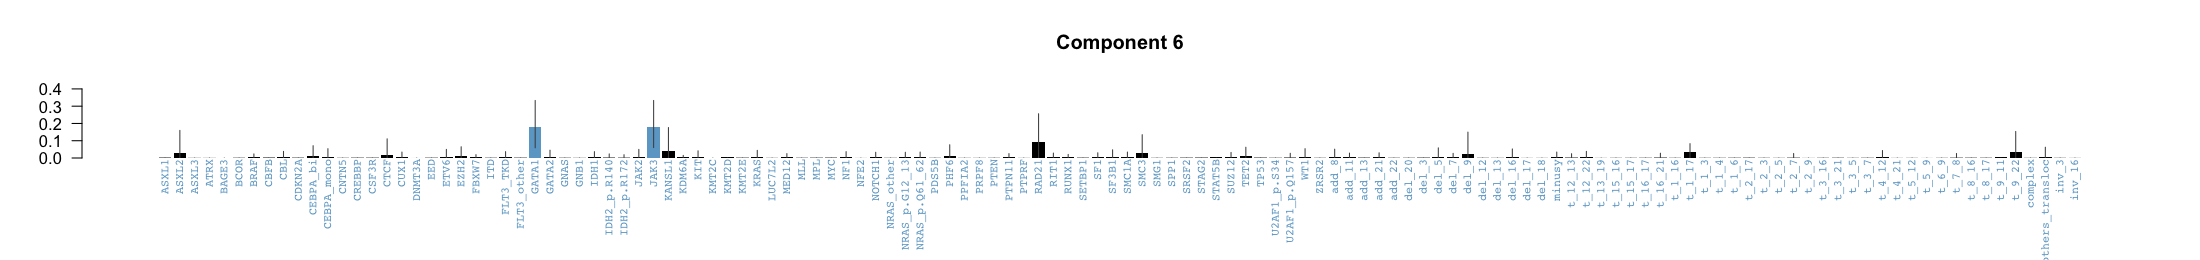

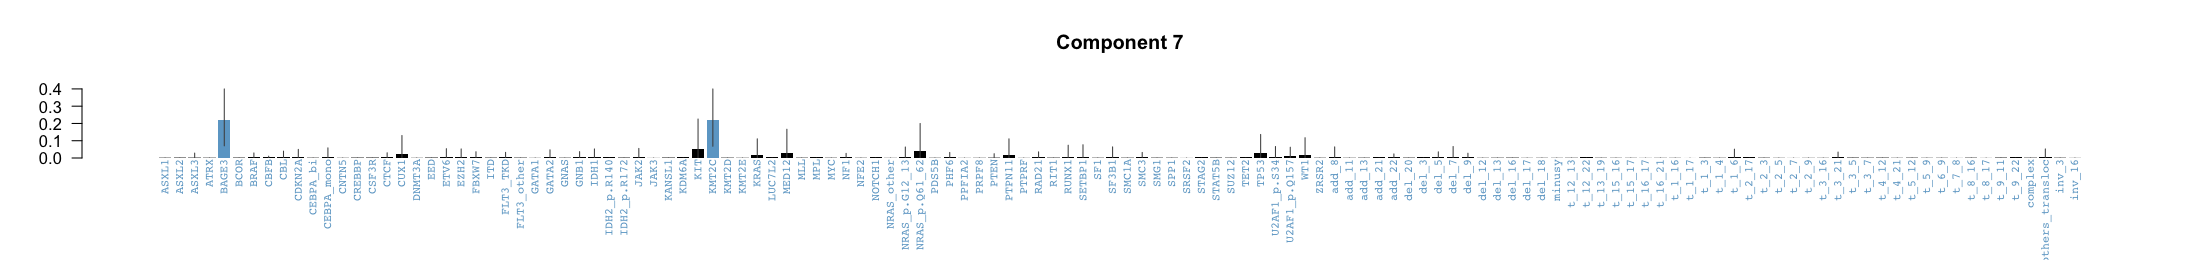

In [5]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
data$t_v_11<- NULL
posterior_samples <- 150
initial_clusters <- 15
burn <- 3000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")


Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq             
2  1           407   45.5257270693512 
3  2           272   30.4250559284116 
4  3           111   12.4161073825503 
5  4            69   7.71812080536913 
6  5            34   3.80313199105145 
1  0             1   0.111856823266219
11 -- total -- 894   100%

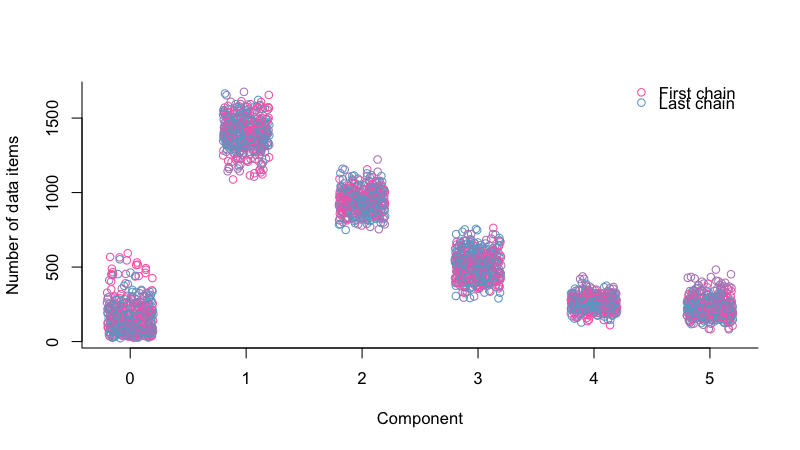

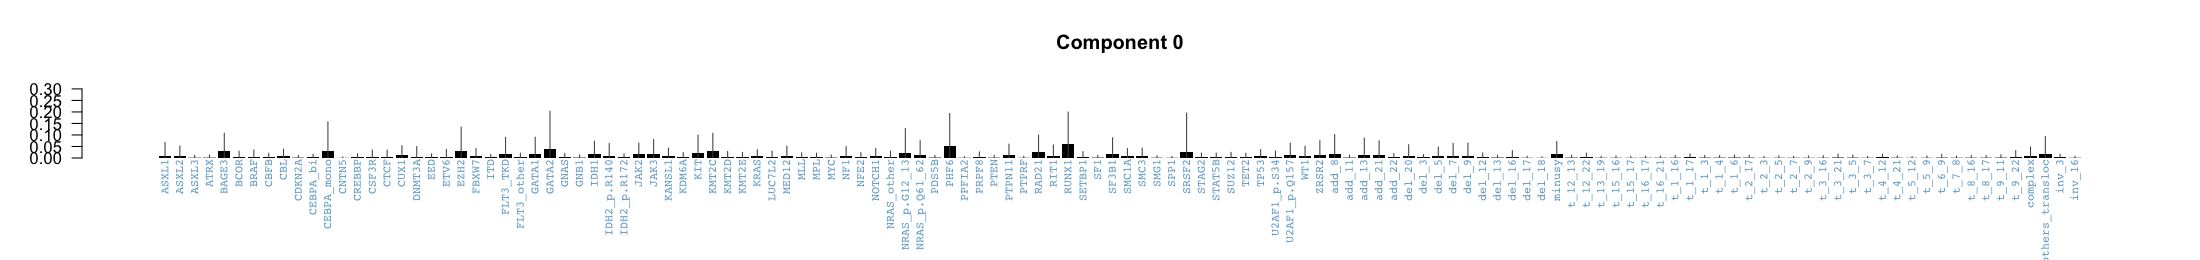

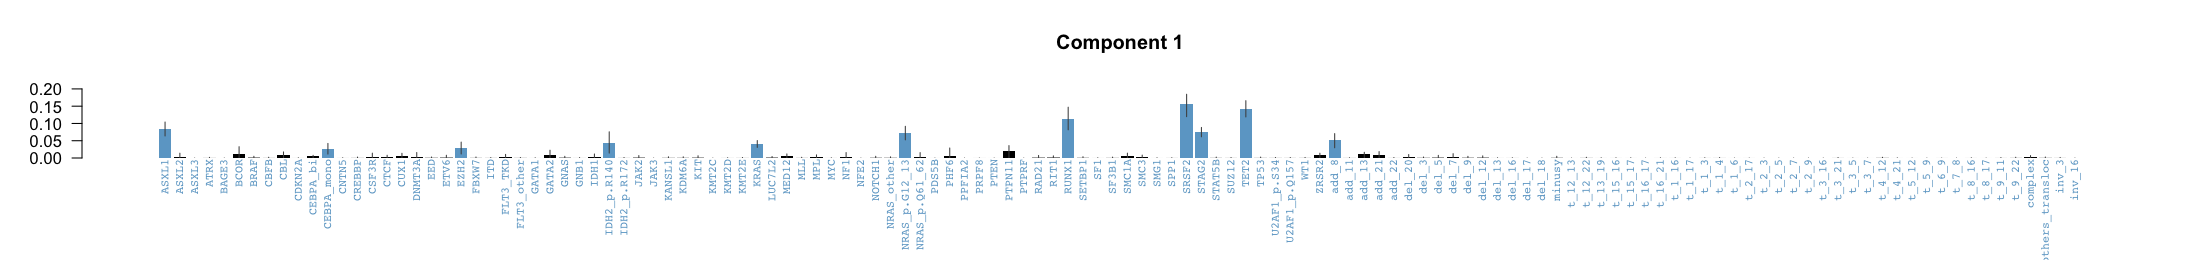

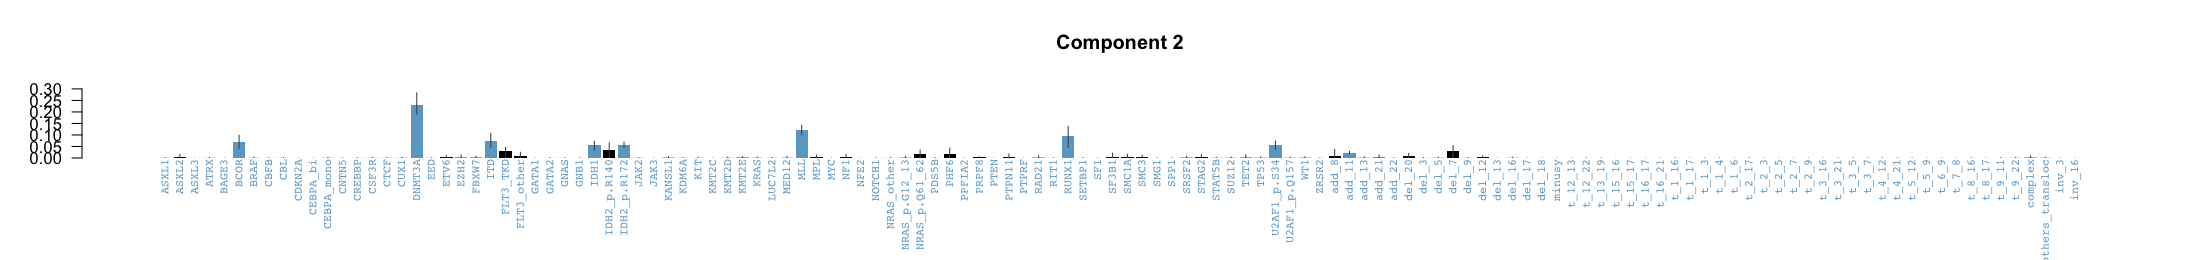

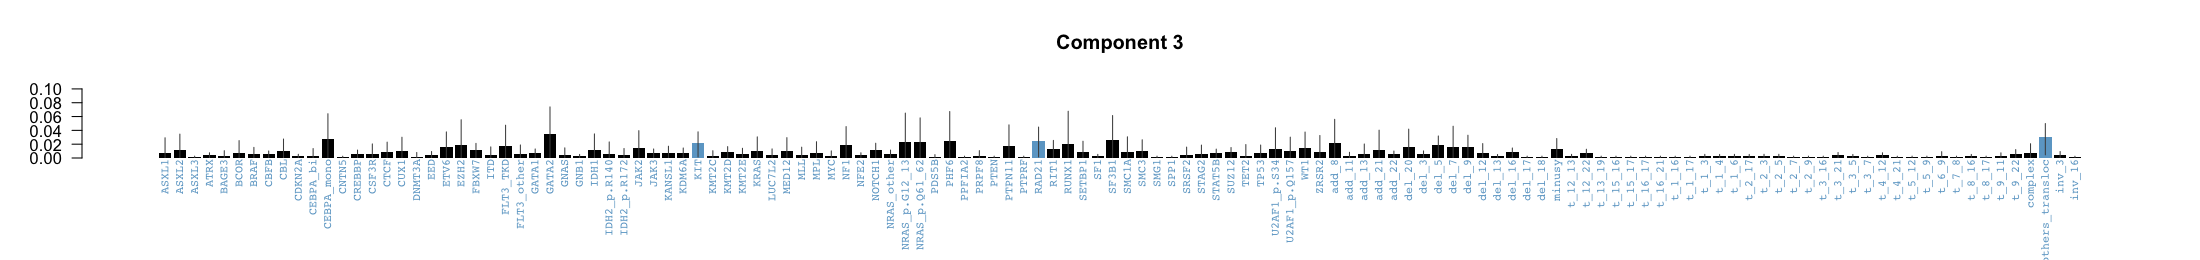

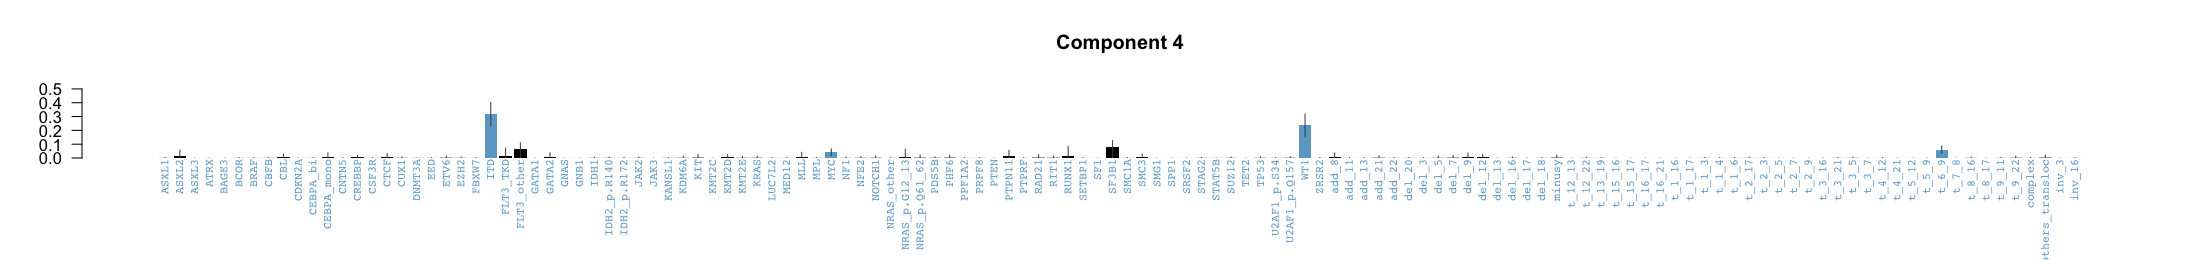

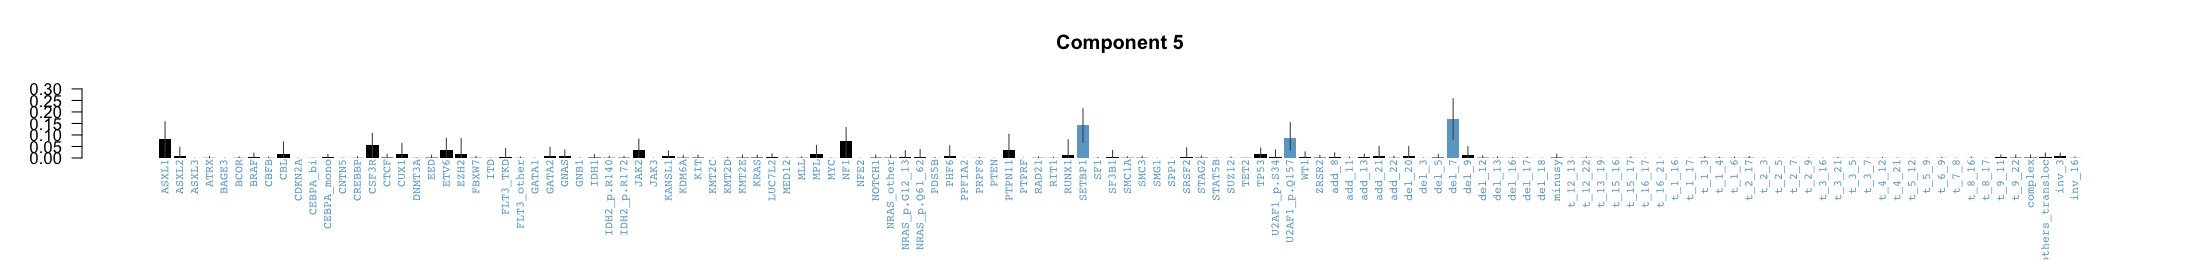

In [6]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
data$t_v_11<- NULL
posterior_samples <- 150
initial_clusters <- 5
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")


Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.1 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "3000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq            
1 1           419   46.8680089485459
2 2           261   29.1946308724832
3 3           106   11.8568232662192
4 4            68   7.60626398210291
5 5            40   4.47427293064877
6 -- total -- 894   100%

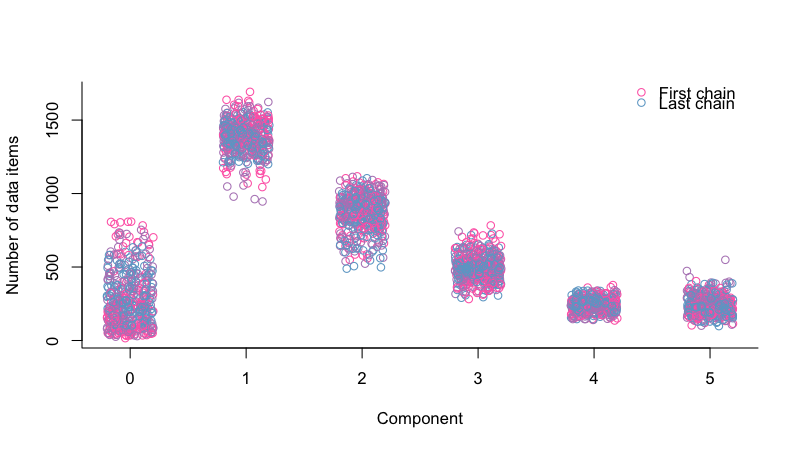

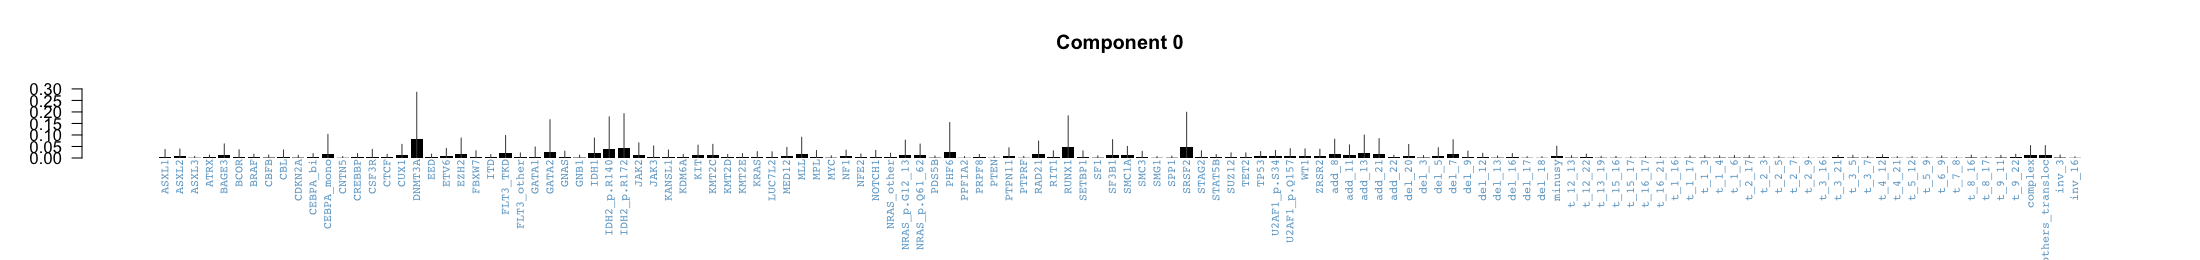

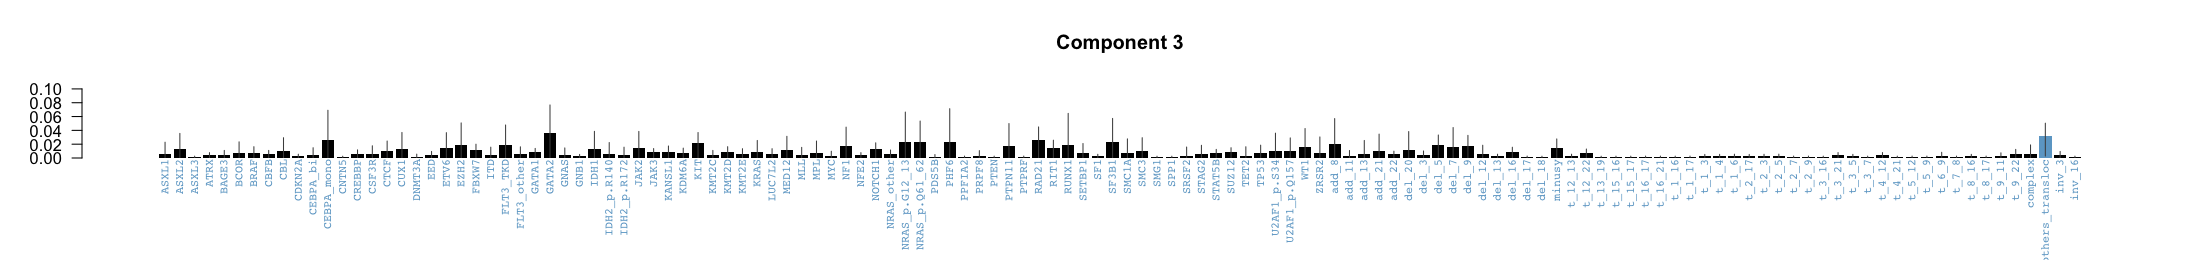

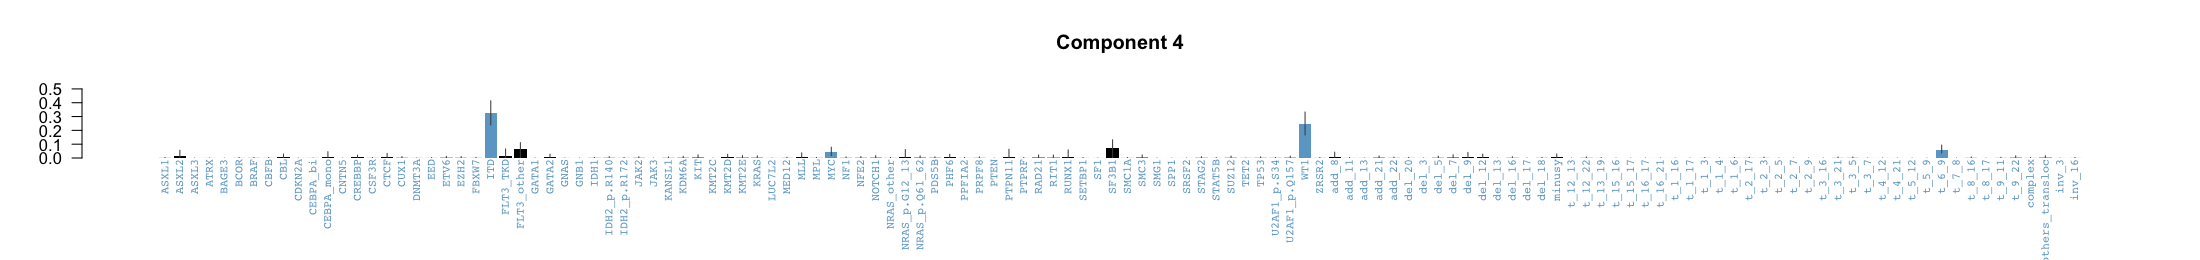

In [7]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 7
burn <- 3000
chains <- 3
base_dist <- gaussian
aa <- 3
ab <-0.5
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")


Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 4 (seed = 400) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 5 (seed = 500) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes

values      count freq            
2  1           410   45.8612975391499
3  2           254   28.4116331096197
4  3            97   10.8501118568233
5  4            65   7.27069351230425
6  5            37   4.13870246085011
1  0            31   3.4675615212528 
11 -- total -- 894   100%

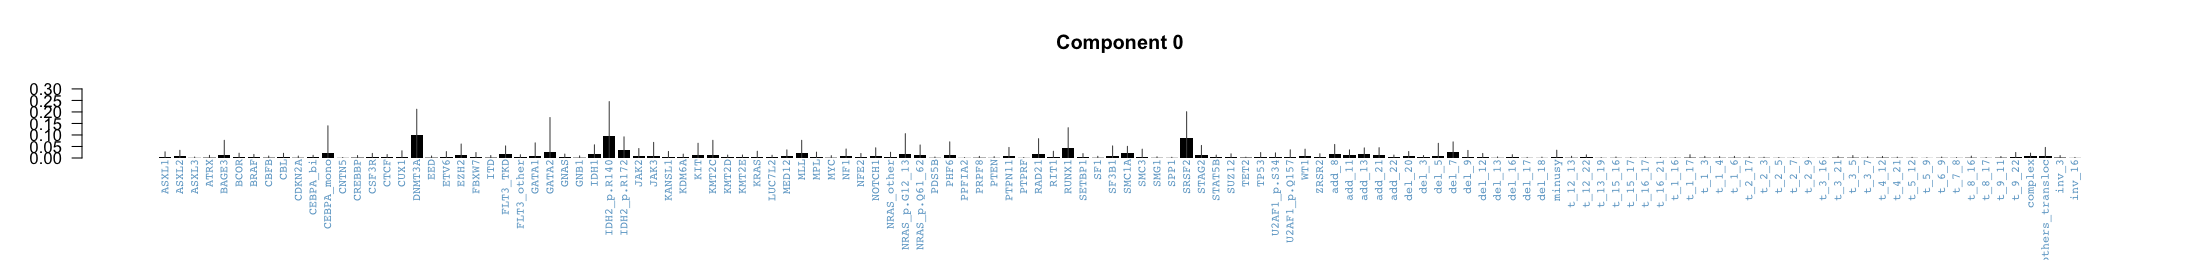

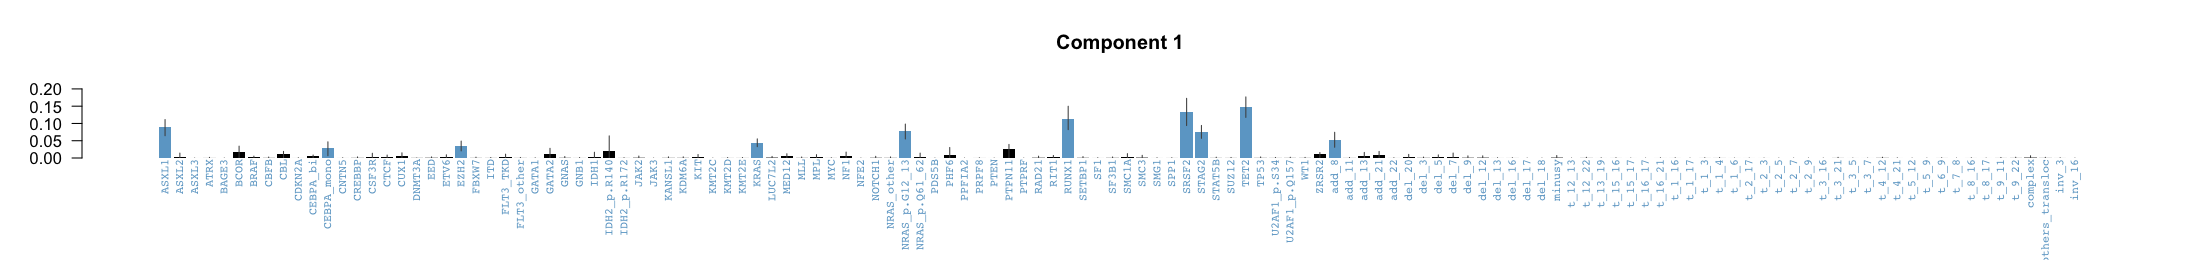

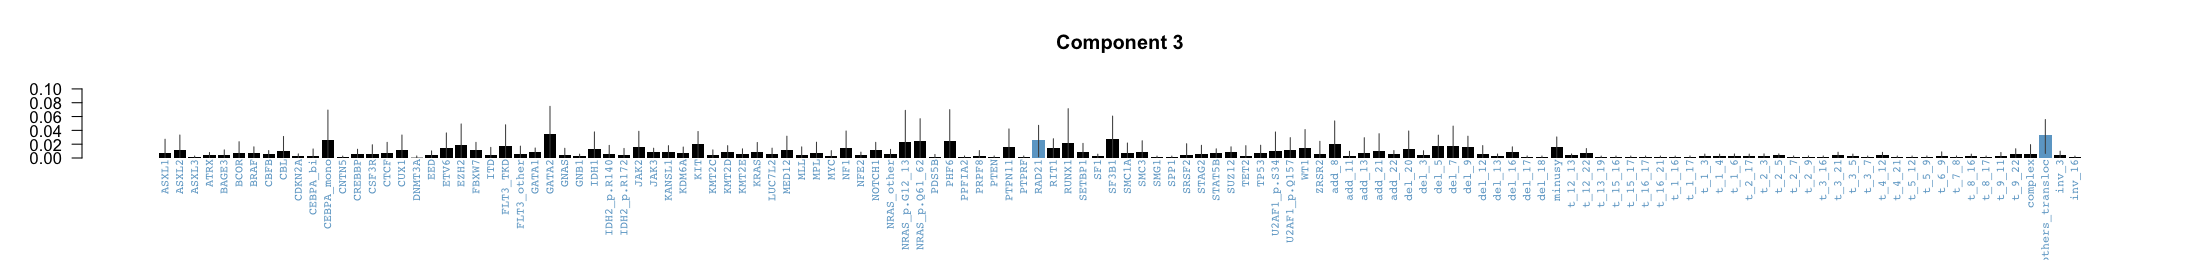

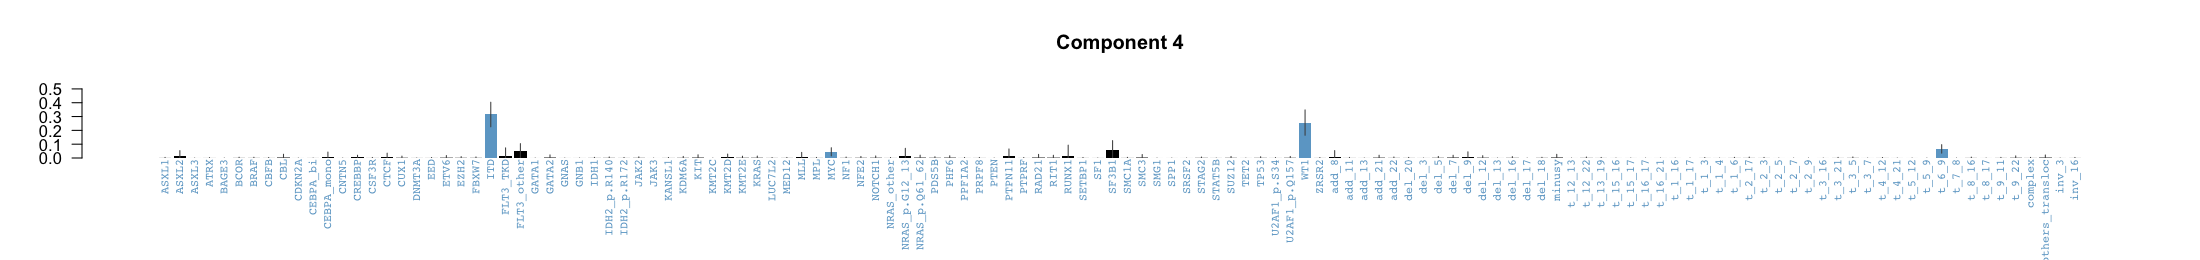

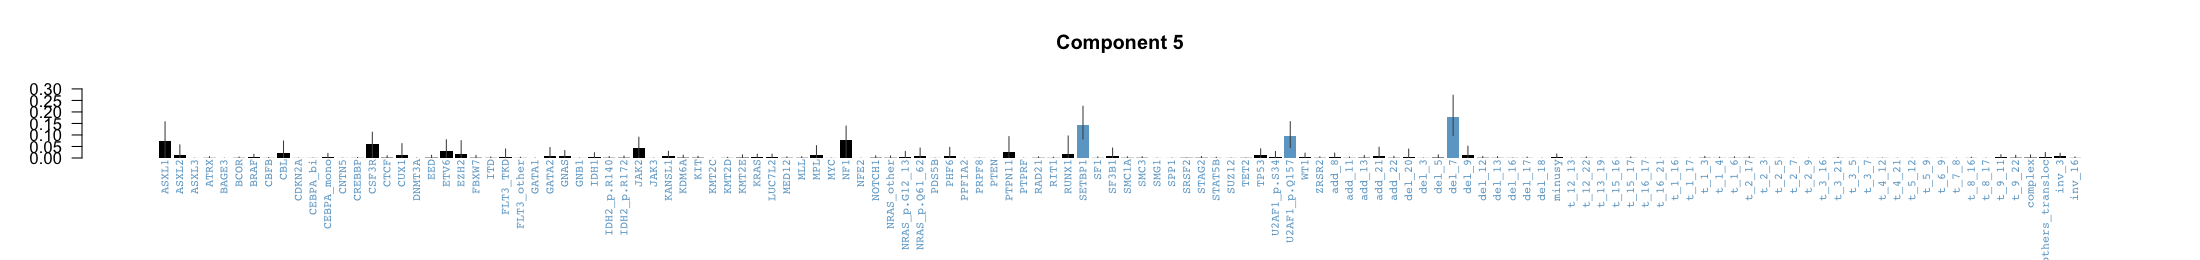

In [8]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 9
burn <- 5000
chains <- 5
base_dist <- gaussian
aa <- 2.5
ab <-1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")


Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq             
2  1           392   43.8478747203579 
3  2           234   26.1744966442953 
4  3           109   12.1923937360179 
6  5            62   6.93512304250559 
1  0            54   6.04026845637584 
5  4            41   4.58612975391499 
7  6             2   0.223713646532438
11 -- total -- 894   100%

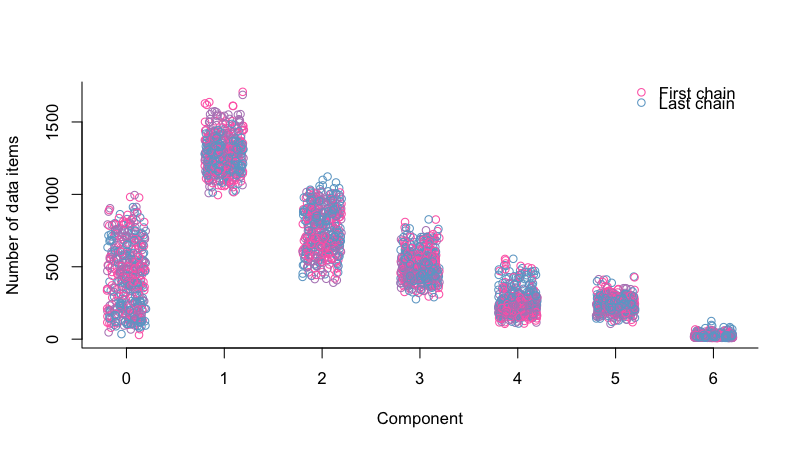

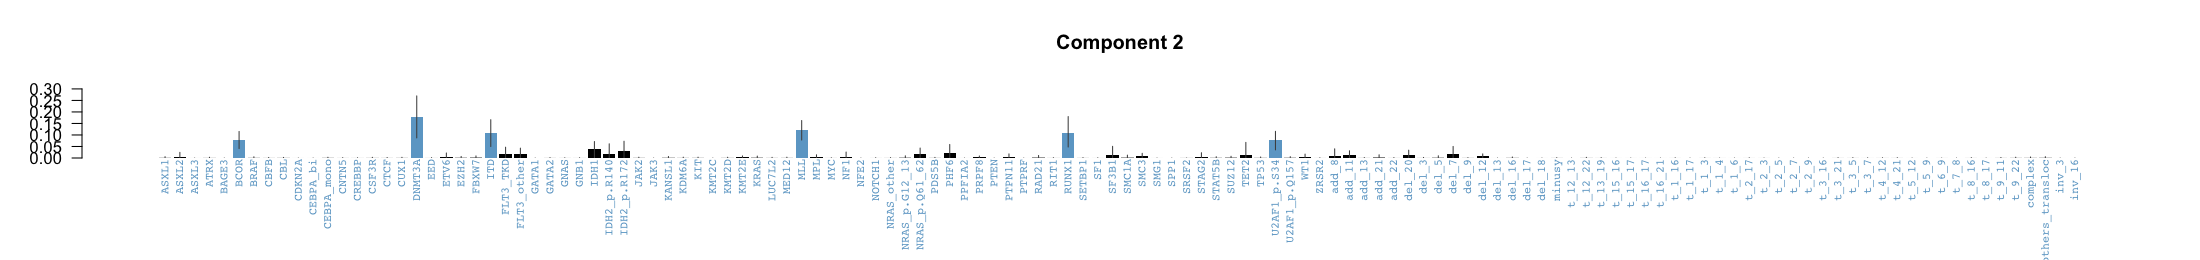

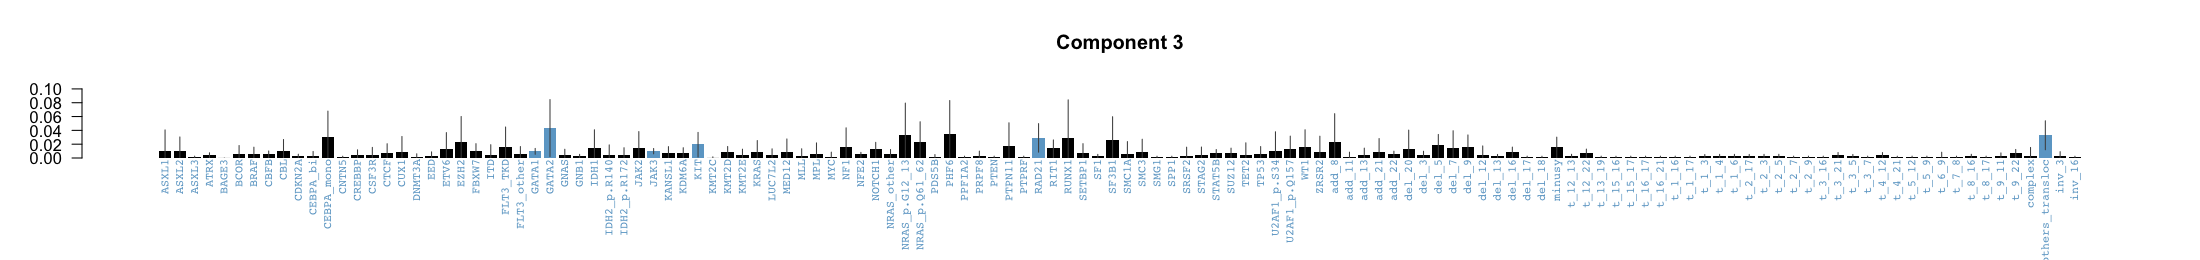

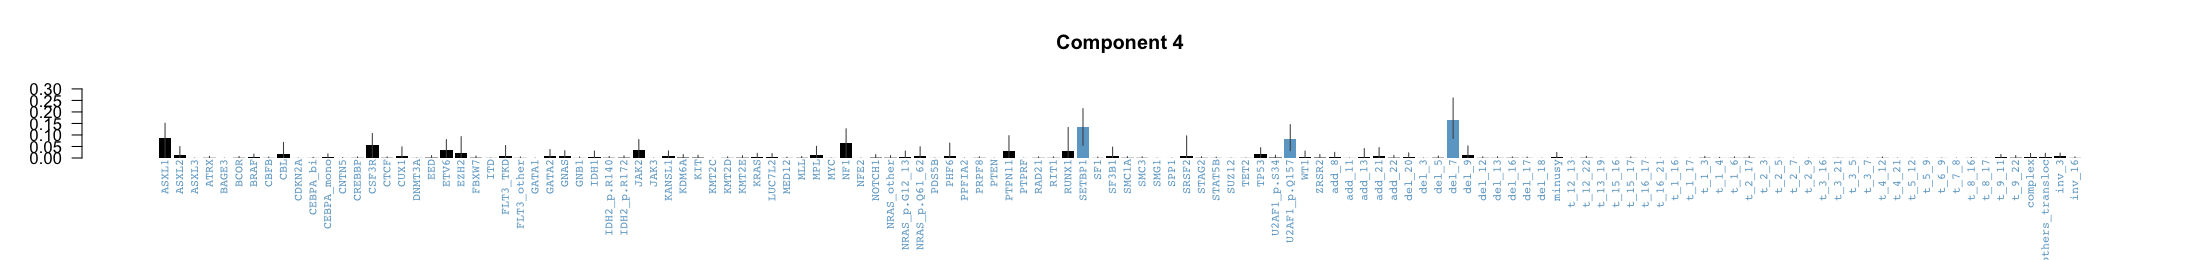

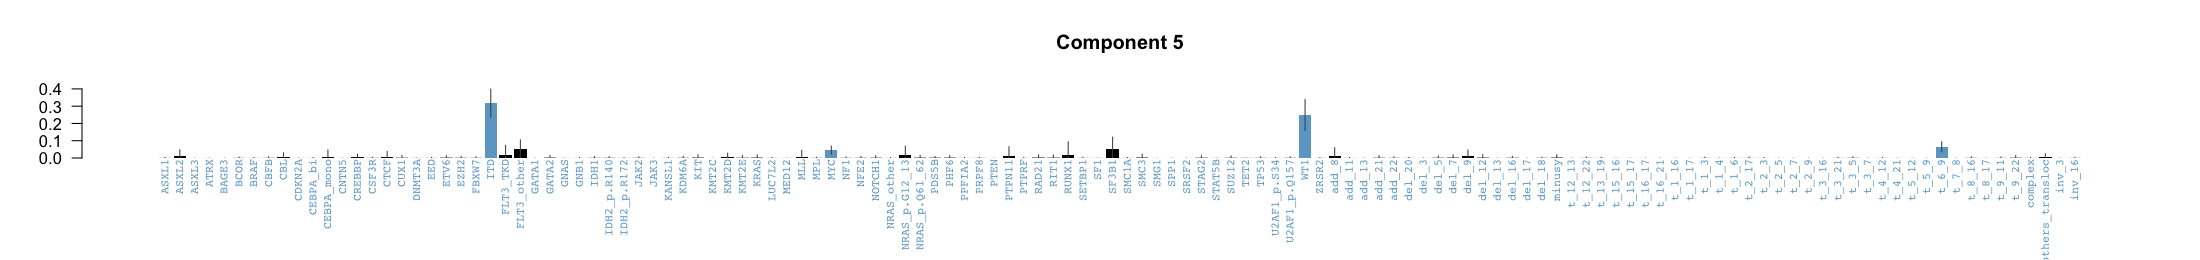

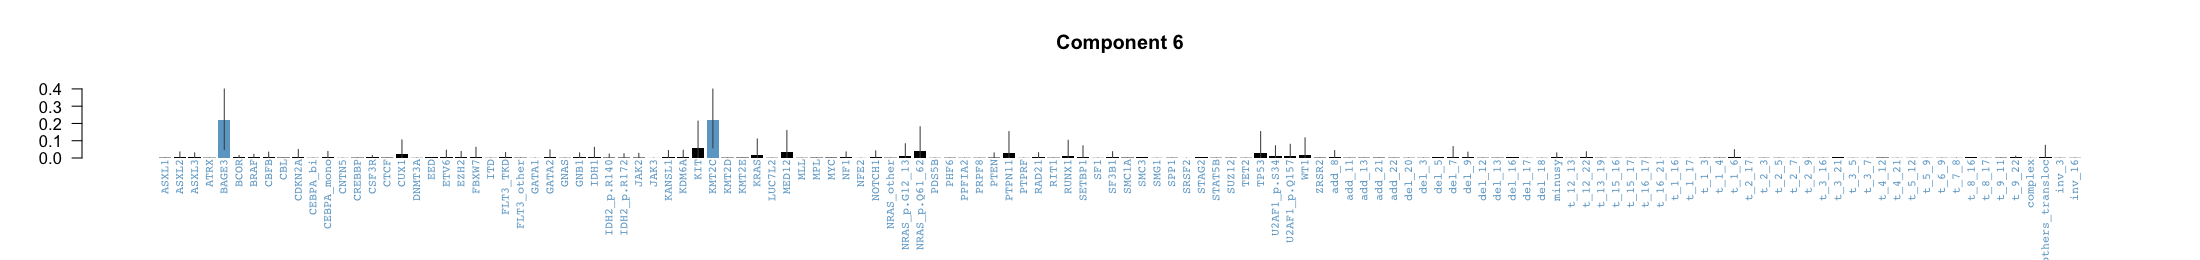

In [9]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 5
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 0.5
ab <-3
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")


Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq             
2  1           400   44.7427293064877 
3  2           271   30.3131991051454 
4  3            96   10.738255033557  
5  4            72   8.05369127516779 
6  5            38   4.25055928411633 
1  0            15   1.67785234899329 
7  6             2   0.223713646532438
11 -- total -- 894   100%

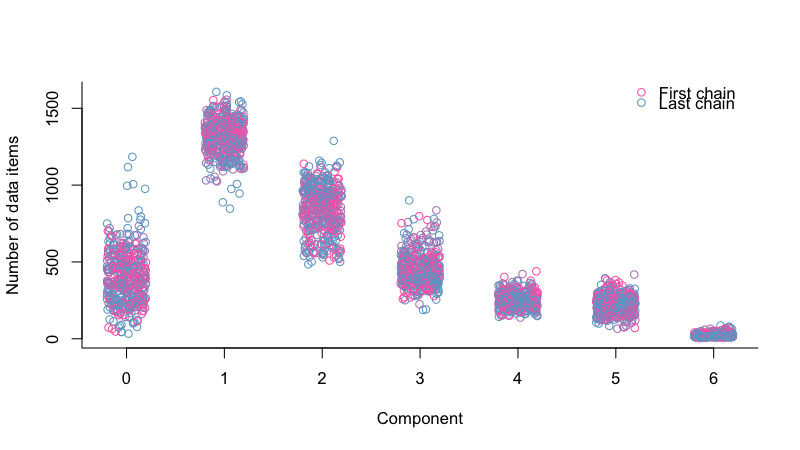

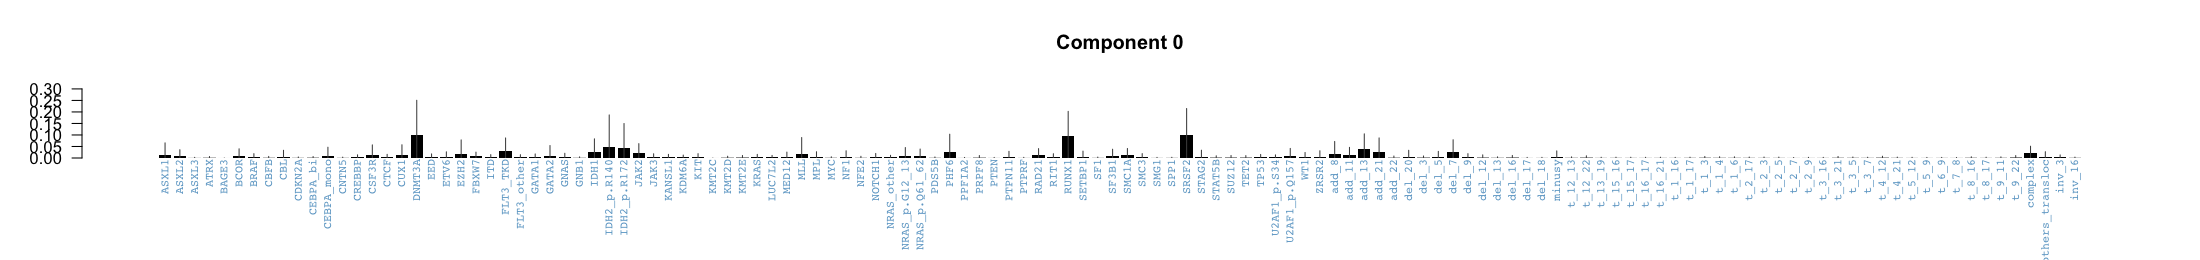

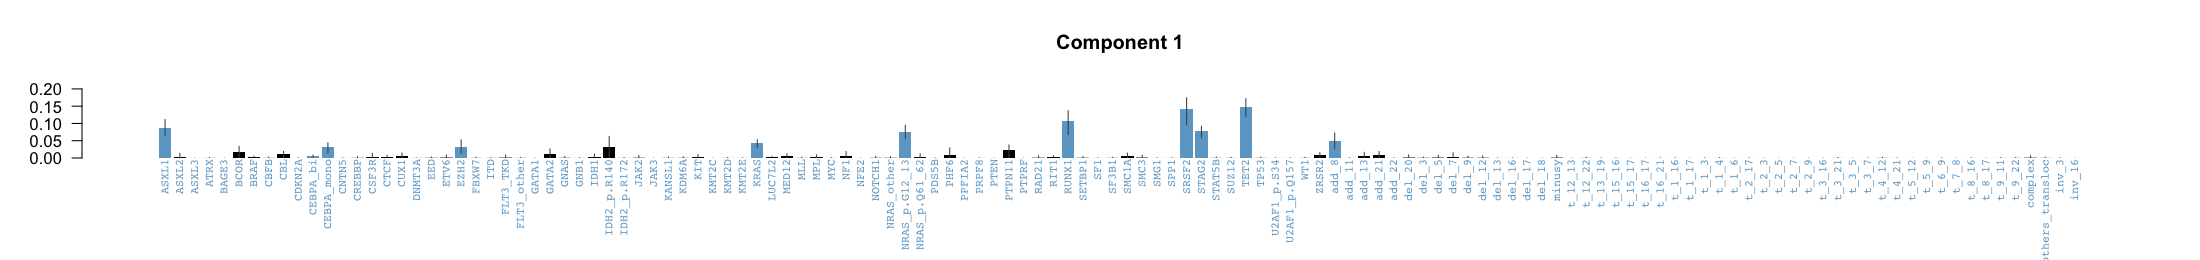

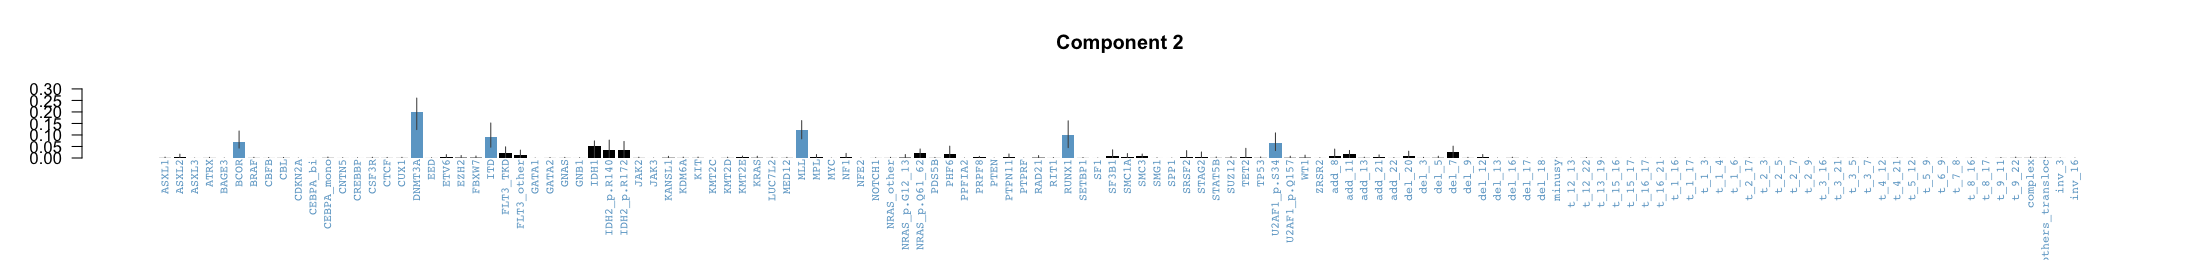

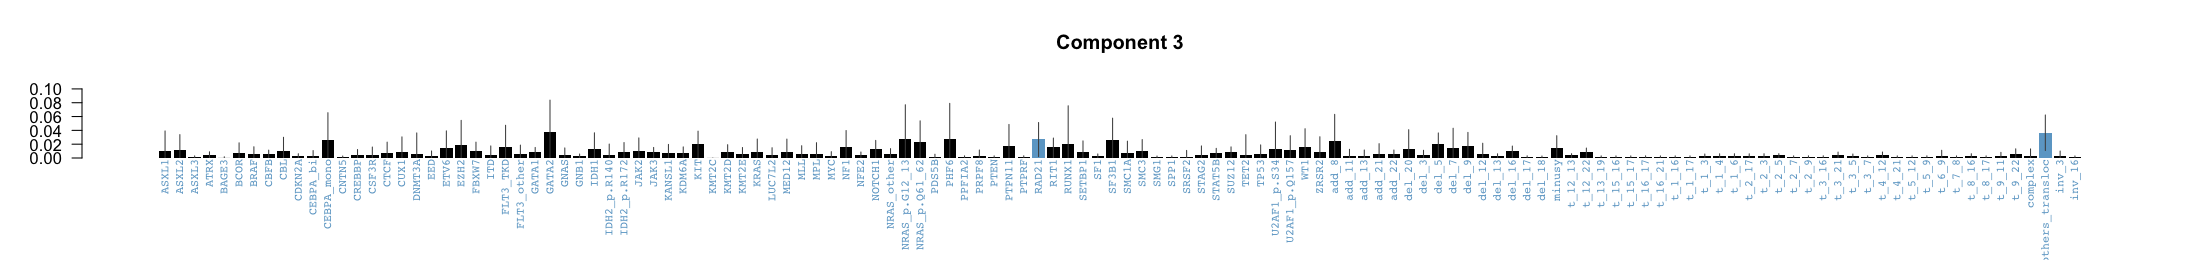

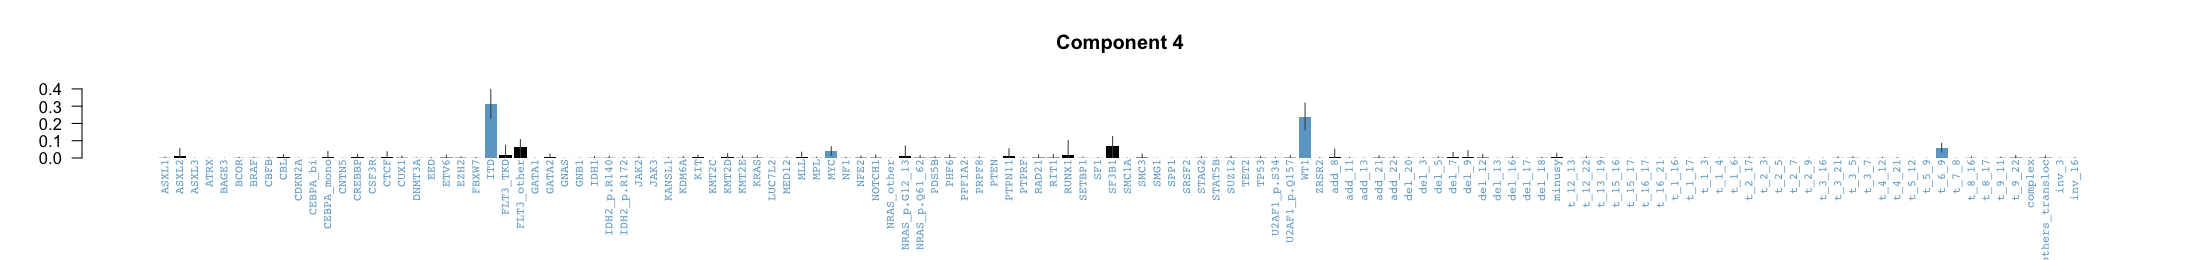

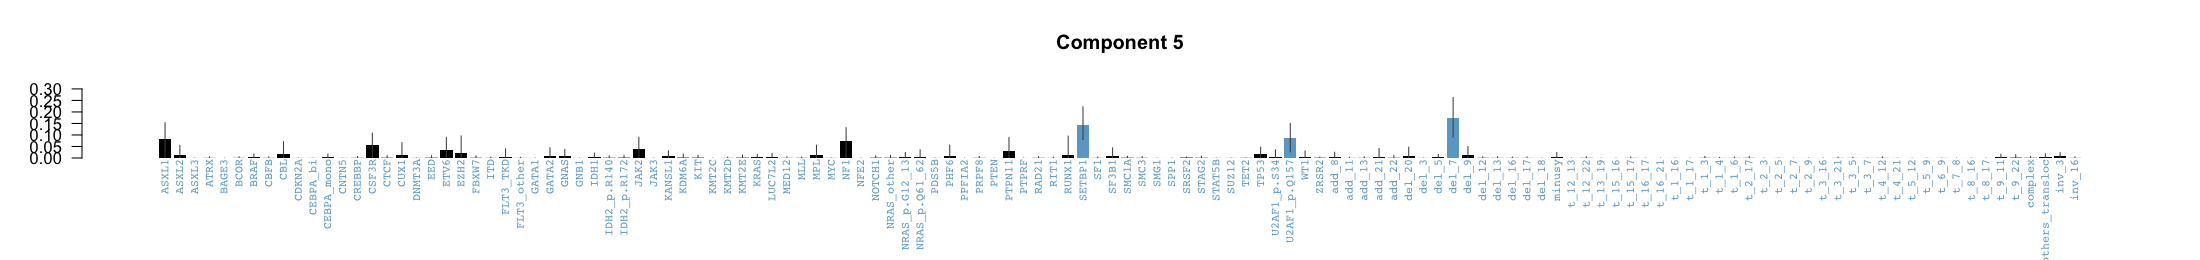

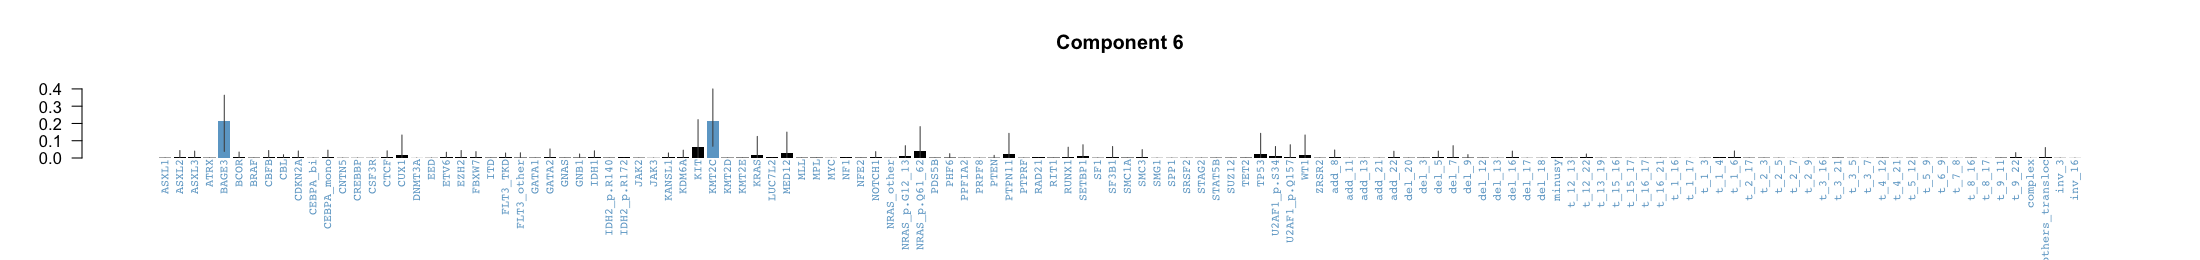

In [10]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <- 150
initial_clusters <- 5
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 0.5
ab <- 4
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")

[1] FALSE

Initialise HDP on a 894 x 130 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "5000 burn-in iterations in 0.2 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 450 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 895 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of da

values      count freq             
2  1           407   45.5257270693512 
3  2           272   30.4250559284116 
4  3           111   12.4161073825503 
5  4            69   7.71812080536913 
6  5            34   3.80313199105145 
1  0             1   0.111856823266219
11 -- total -- 894   100%

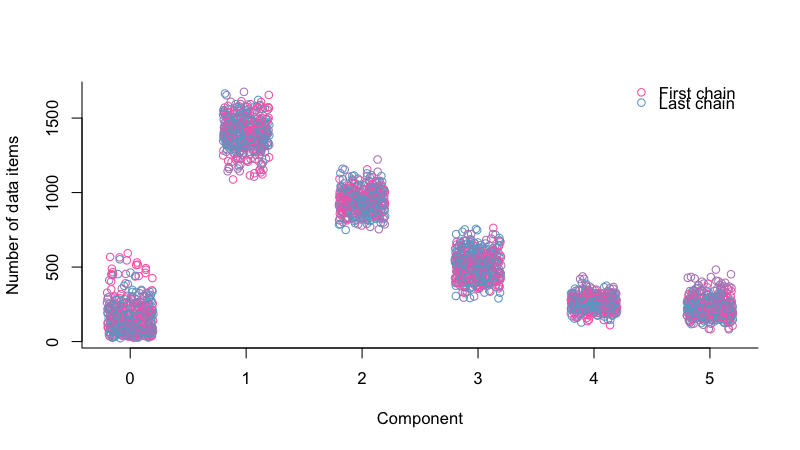

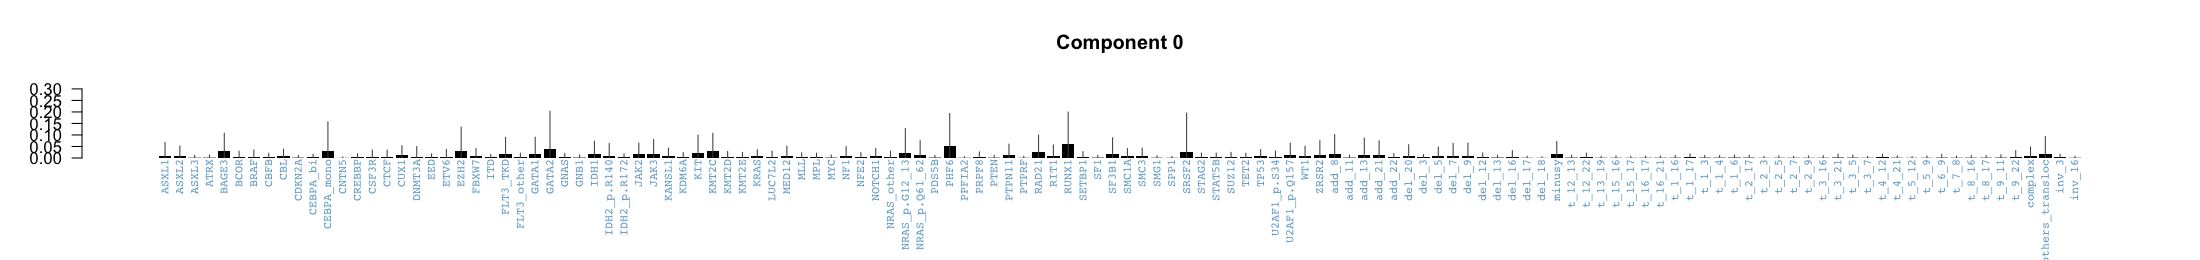

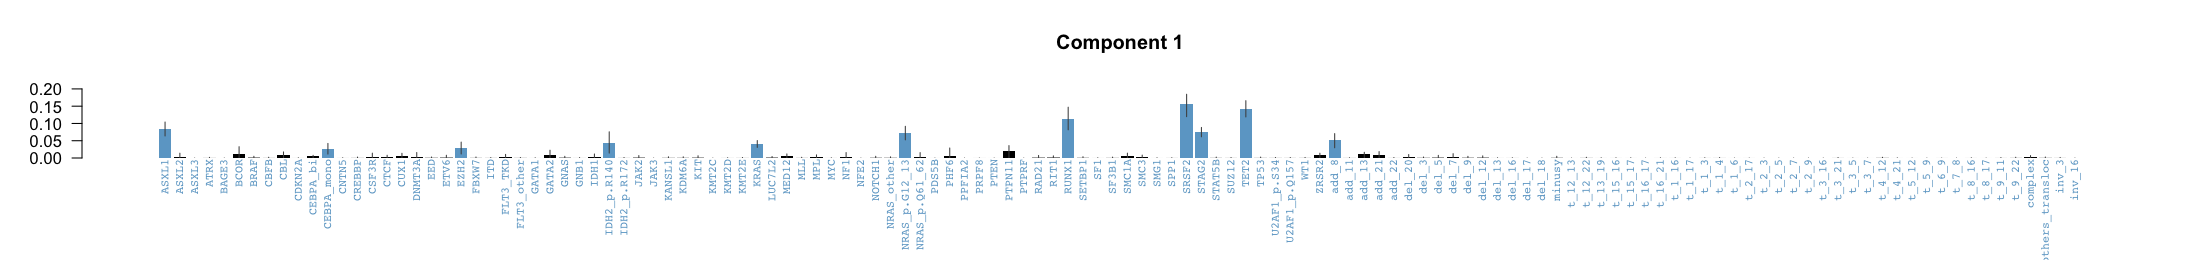

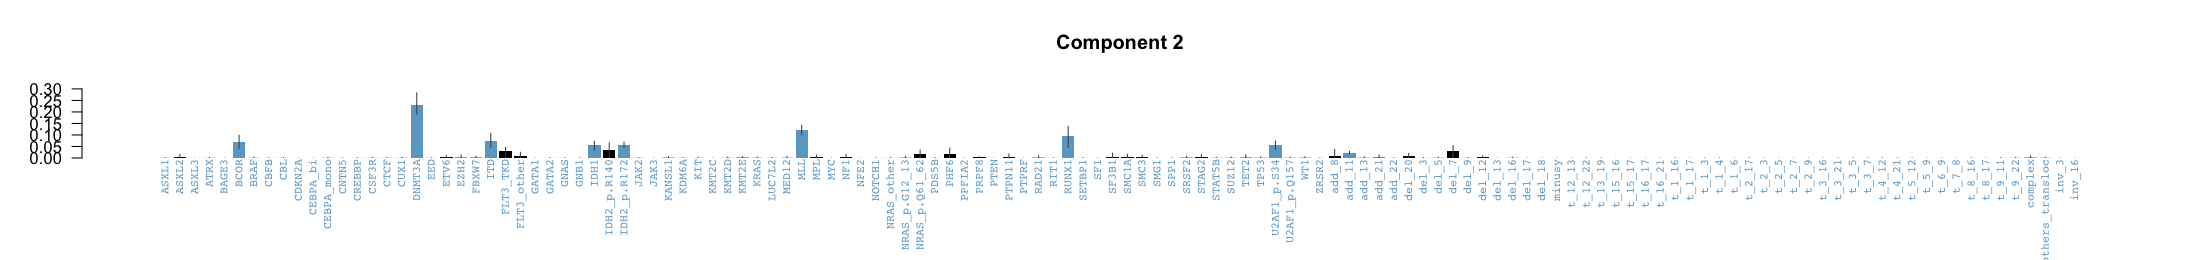

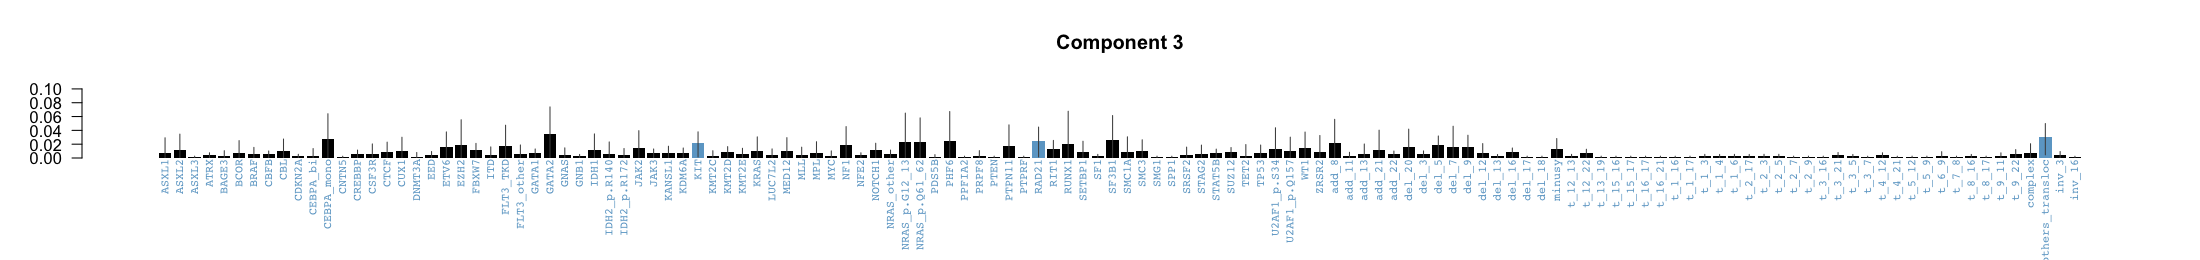

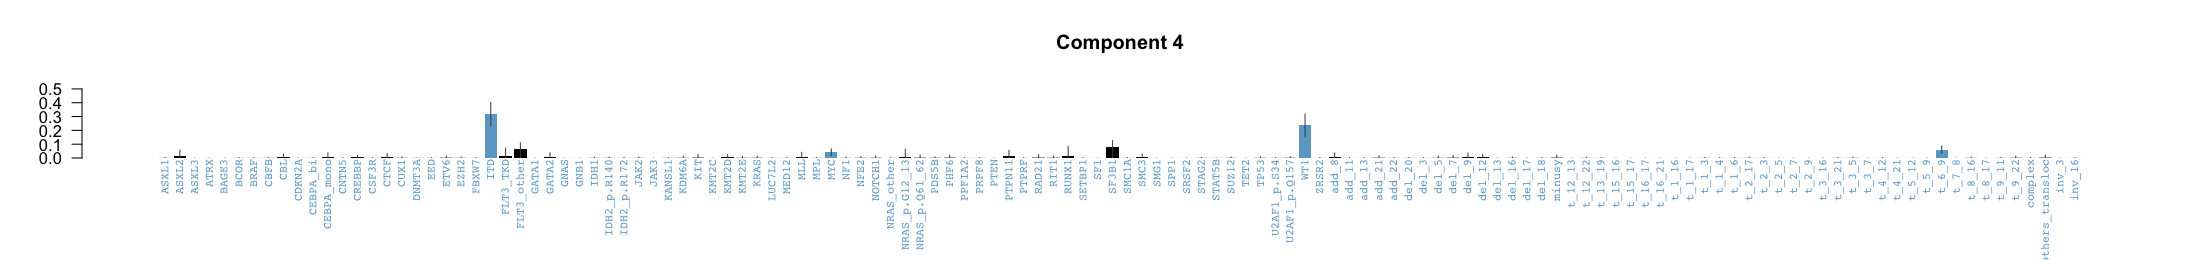

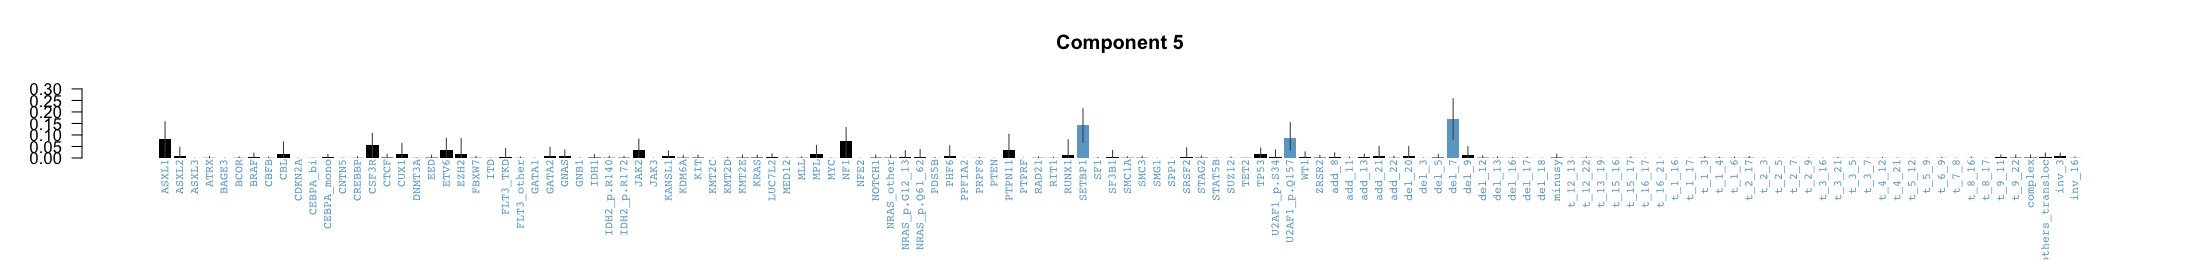

In [11]:
data <- df_to_recluster[colSums(df_to_recluster) > 0]
posterior_samples <100
initial_clusters <- 5
burn <- 5000
chains <- 3
base_dist <- gaussian
aa <- 1
ab <- 1
multi_output <- launch(df_to_recluster[colSums(df_to_recluster) > 0],base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_recluster_7 <- extract_components(multi_output)
dd_predicted_7_components <- get_prediction_result_dataframe(multi_output_recluster_7, df_final)
tab <- get_table(dd_predicted_7_components[,'predicted_component'])
tab
plot_components_size(multi_output_recluster_7,8,4.5)
set_notebook_plot_size(22,2.6)
plot_comp_distn(multi_output_recluster_7,
                    cat_names  = colnames(df_to_recluster[colSums(df_to_recluster) > 0]),
                    col        = "skyblue3",
                    col_nonsig = "black")